In [1]:
%matplotlib inline

In [2]:
#from __future__ import print_function,division
import tensorflow
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

from torchvision import datasets, models, transforms
import os

In [3]:
data_transforms = {
    'train': transforms.Compose([transforms.Scale(size=[32,32]),transforms.ToTensor(),
                                 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]),
    'val': transforms.Compose([transforms.Scale(size=[32,32]),transforms.ToTensor(),
                                 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]),
}

data_dir = './data/'
dsets = {x: datasets.ImageFolder(os.path.join(data_dir, x),data_transforms[x])
         for x in ['train','val']}
dset_loaders = {x: torch.utils.data.DataLoader(dsets[x], batch_size=10,
                                               shuffle=True, num_workers=4)
                for x in ['train', 'val']}
dset_sizes = {x: len(dsets[x]) for x in ['train','val']}
dset_classes = dsets['train'].classes

    2     2     0     0     1     0     0     0     0     0


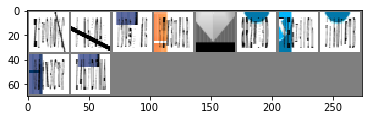

In [4]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(dset_loaders['val'])
images, labels = dataiter.next()
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % labels[j] for j in range(10)))

In [5]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 3)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [7]:
trainloader = dset_loaders['train']
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 500 == 499:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,   500] loss: 0.252
[1,  1000] loss: 0.111
[1,  1500] loss: 0.081
[1,  2000] loss: 0.051
[1,  2500] loss: 0.022
[1,  3000] loss: 0.013
[1,  3500] loss: 0.007
[1,  4000] loss: 0.006
[1,  4500] loss: 0.007
[1,  5000] loss: 0.005
[1,  5500] loss: 0.004
[1,  6000] loss: 0.004
[1,  6500] loss: 0.003
[2,   500] loss: 0.001
[2,  1000] loss: 0.003
[2,  1500] loss: 0.002
[2,  2000] loss: 0.002
[2,  2500] loss: 0.002
[2,  3000] loss: 0.001
[2,  3500] loss: 0.002
[2,  4000] loss: 0.003
[2,  4500] loss: 0.001
[2,  5000] loss: 0.001
[2,  5500] loss: 0.001
[2,  6000] loss: 0.001
[2,  6500] loss: 0.001
Finished Training


In [8]:
torch.save(net.state_dict(),'./slide_fil_para2.pkl')

GroundTruth:      0     0     0     1     0     0     1     0     0     0


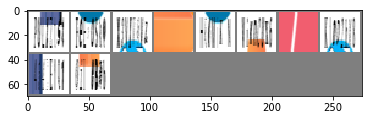

In [9]:
testloader =  dset_loaders['val']
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % labels[j] for j in range(10)))

In [10]:
outputs = net(Variable(images))
_, predicted = torch.max(outputs.data, 1)

#print('Predicted: ', ' '.join('%5s' % predicted[j][0]
 #                             for j in range(4)))

In [11]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the test images: 100 %


In [12]:
class_correct = list(0. for i in range(3))
class_total = list(0. for i in range(3))
for data in testloader:
    images, labels = data
    #print(len(labels))
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(len(labels)):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(3):
    print('Accuracy of %5s : %2d %%' % (
        i, 100 * class_correct[i] / class_total[i]))

Accuracy of     0 : 100 %
Accuracy of     1 : 100 %
Accuracy of     2 : 100 %


In [13]:
class_total

[8100.0, 2900.0, 1200.0]